In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
apple = pd.read_csv("./AAPL_Options.csv")
s = 164.85
current = pd.to_datetime("2022-02-25")
expire = pd.to_datetime("2022-03-18")
r = 0.0025
coupon = 0.0053
b = r - coupon
days = (expire - current).days
t = days / 365
x = 0
put = 0
call = 0

In [3]:
def funcall(sig):
    return s*np.e**((b-r)*t)*norm.cdf((np.log(s/x) + t*(sig**2/2 + b))/(sig*(t**0.5))) - x*np.e**(-r*t)*norm.cdf((np.log(s/x) + t*(sig**2/2 + b))/(sig*(t**0.5)) - sig * (t**0.5)) - call

In [4]:
def funcput(sig):
    return x*np.e**(-r*t)*norm.cdf(-((np.log(s/x) + t*(sig**2/2 + b))/(sig*(t**0.5)) - sig * (t**0.5))) - s*np.e**((b-r)*t)*norm.cdf(-(np.log(s/x) + t*(sig**2/2 + b))/(sig*(t**0.5))) - put

In [5]:
callvals = []
putvals = []
strikescall = []
strikesput = []

In [6]:
for i in range(len(apple.index)):
    line = np.array(apple.loc[i])
    x = line[3]
    if line[2] == "Call":
        strikescall.append(x)
        call = line[4]
        root = fsolve(funcall, 0.8)[0]
        callvals.append(root)
        print("Implied volatility call: " + str(root))
    else:
        strikesput.append(x)
        put = line[4]
        root = fsolve(funcput, 0.8)[0]
        putvals.append(root)
        print("Implied volatility put: " + str(root))
       

Implied volatility call: 0.49989766434694327
Implied volatility call: 0.4528857682172305
Implied volatility call: 0.41271998726752934
Implied volatility call: 0.3697059692673745
Implied volatility call: 0.3403938033193798
Implied volatility call: 0.30431557962264316
Implied volatility call: 0.273378086926953
Implied volatility call: 0.2498887145319647
Implied volatility call: 0.23593770502211314
Implied volatility call: 0.23779933115184462
Implied volatility call: 0.2525629328139015
Implied volatility call: 0.27846861029774034
Implied volatility call: 0.2808840081598242
Implied volatility call: 0.3102706294910602
Implied volatility put: 0.4895447177312108
Implied volatility put: 0.44302698281838077
Implied volatility put: 0.40242712409079495
Implied volatility put: 0.3681003022337994
Implied volatility put: 0.33226166818823494
Implied volatility put: 0.29995537863934313
Implied volatility put: 0.2701101044255506
Implied volatility put: 0.2473298426474032
Implied volatility put: 0.23156

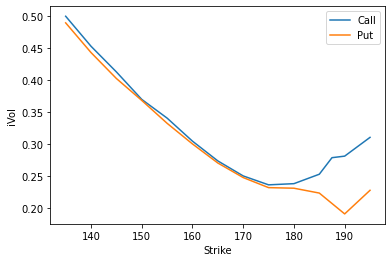

In [7]:
plt.plot(strikescall, callvals, label="Call")
plt.plot(strikesput, putvals, label="Put")
plt.xlabel('Strike')
plt.ylabel('iVol')
plt.legend()
plt.show()